In [4]:
# loading data

import pandas as pd
train_data = pd.read_csv("../Datasets/MNIST/train.csv")
test_data = pd.read_csv("../Datasets/MNIST/test.csv")

Text(0.5, 1.0, 'Digit 4')

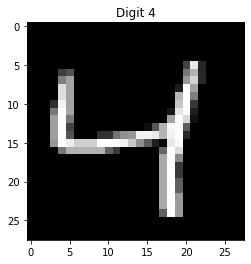

In [9]:
# sample image

four = train_data.iloc[2, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [10]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(60000, 785)


In [11]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (60000, 784)
test_data: (10000, 785)


In [14]:
# scaling the features
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [16]:
# linear model
from sklearn.svm import SVC

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [17]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9103333333333333 

[[1719    0   10    5    3   16   12    1    6    0]
 [   1 1951   11    5    5    4    0    3   11    1]
 [  11   26 1676   30   23    5   23   19   17    1]
 [  10    4   47 1627    4   66    5   19   42   10]
 [   4    8   21    1 1658    5   14    6    5   50]
 [  21    9   19   87   12 1423   30    1   39   11]
 [  20    7   23    1   14   20 1666    2    4    0]
 [   7   13   19   16   31    4    2 1774    5   93]
 [  25   44   49   54   12   58   18   11 1436   17]
 [   4   11   19   23   90    9    1   69   20 1456]]


In [18]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [19]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.943 

[[1722    0   15    4    1    6   13    2    8    1]
 [   1 1947   21    7    5    0    1    2    7    1]
 [   5    6 1747   11   12    3   14   16   14    3]
 [   2    3   52 1685    1   37    2   21   26    5]
 [   1    5   31    1 1664    5    9    7    4   45]
 [   3    5   28   33    3 1526   27    5   15    7]
 [   8    4   21    0    4   14 1698    1    7    0]
 [   3   11   52    7   14    0    0 1828    2   47]
 [  10   22   32   18    9   26   11    5 1585    6]
 [   3    5   25   17   23    4    0   38   15 1572]]
